# Homework 3 (Due 4/26 11:59 PM)

## Name:

## ID:

## Instructions
Run everything (select cell in the menu, and click Run all), export as pdf, and submit the pdf to gradescope. 

To export as pdf, you can use the following methods: (1) File -> download as -> pdf (2) print as pdf from browser.

**Q1** 

An important concept in machine learning and data science is the
[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Read the wikipedia page and answer the following questions.

Given the following synthetic data: 
Each patient is tested for a disease. The test is either positive or negative. The true status of the patient is either having the disease or not having the disease.

In [33]:
# DO NOT modify this block of code
import pandas as pd

# Create a DataFrame with synthetic data for 10 patients
data = {
    'Patient_ID': range(1, 11),
    'Age': [25, 47, 30, 50, 23, 45, 34, 29, 40, 38],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Symptoms_Score': [8, 2, 7, 3, 9, 6, 4, 8, 1, 5],  # A score indicating the severity of symptoms
    'Actual': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],  # Actual disease status
    'Predicted': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']  # Predictions by a model
}

synthetic_df = pd.DataFrame(data)

# Display the DataFrame
synthetic_df


,Patient_ID,Age,Gender,Symptoms_Score,Actual,Predicted
0,1,25,Male,8,Yes,Yes
1,2,47,Female,2,No,No
2,3,30,Female,7,Yes,Yes
3,4,50,Male,3,No,Yes
4,5,23,Female,9,Yes,No
5,6,45,Male,6,Yes,Yes
6,7,34,Female,4,No,No
7,8,29,Male,8,Yes,Yes
8,9,40,Female,1,No,Yes
9,10,38,Male,5,Yes,No


(1) Compute the confusion matrix: what are the number of true positives, true negatives, false positives, and false negatives?


In [34]:
# code here, compute the number of true positives(TP), true negatives(TN), false positives(FP), and false negatives(FN
actual = synthetic_df['Actual'] == 'Yes'
predicted = synthetic_df['Predicted'] == 'Yes'

# Calculate the number of true positives
TP = sum(actual & predicted)
TN = sum(~actual & ~predicted)
FP = sum(~actual & predicted)
FN = sum(actual & ~predicted)

# Print the results
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')


TP: 4, TN: 2, FP: 2, FN: 2


(2) Compute the [Precision, Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

These are various metrics to evaluate the results, depending on the applications

In [35]:
# code here


precision = TP / (TP + FP)  
recall = TP / (TP + FN)

sensitivity = recall
specificity = TN / (TN + FP)

# Print the results
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}')

print(f'Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}')

Precision: 0.67, Recall: 0.67
Sensitivity: 0.67, Specificity: 0.50


Q2. 

Let's bring our data science skill to the Wall Street. 
One model of stock price is the random walk model:

Suppose $X_n$ is the stock price at day $n$. $X_0$ is the initial stock price. At each day, the change of stock price is a random variable $Z_n$, which is normally distributed with mean $\mu$ and variance $\sigma^2$. The stock price at day $n$ is $X_n = X_{n-1} + Z_n$.

(1) Write a function `stock_price_simulation`, that take input 

- `X0`: the initial stock price
- `mu`: the mean of the normal distribution
- `sigma`: the standard deviation of the normal distribution
- `n`: the number of days

Return a list (or numpy array) of stock prices at each day $[X_0, X_1, ..., X_n]$.





In [36]:
import numpy as np
def stock_price_simulation(X0, mu, sigma, n):

    x = np.zeros(n+1)
    x[0] = X0
    for i in range(1,n+1):
        x[i] = x[i-1] + np.random.normal(mu, sigma)
    return x



(2) Take $X_0 = 100, n = 100, \mu = 0.1, \sigma = 1$. Sample 10 trajectories of the stock price and plot them in the same graph.


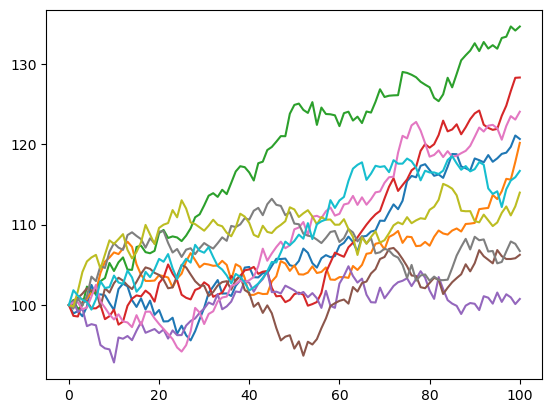

In [37]:
import matplotlib.pyplot as plt

N = 10
n = 100
x0 = 100
mu = 0.1
sigma = 1
trajectories = np.zeros((N, n+1))
for i in range(N):
    trajectories[i] = stock_price_simulation(x0, mu, sigma, n)

plt.plot(trajectories.T)

(3) Estimate the expectation and standard deviation of the stock price on day 100, using 1000 samples.

In [38]:
N = 1000
trajectories = np.zeros((N, n+1))
for i in range(N):
    trajectories[i] = stock_price_simulation(x0, mu, sigma, n)

final_prices = trajectories[:, -1]

estimate_mean = np.mean(final_prices)
estimate_std = np.std(final_prices)

print(f'Estimate mean: {estimate_mean:.2f}, Estimate variance: {estimate_std:.2f}')


Estimate mean: 110.05, Estimate variance: 9.65


(4) A call option is a contract that allows you to buy a stock at a fixed price at a future date. Suppose you own a call option that allows you to buy a stock at day 100 at price 105 (this is called the strike price).

If the stock price at day 100 is above 105, you can excercise the option, pay 105 to get the stock, and sell it at the market price to make a profit. Otherwise, you don't excercise the option and don't make a profit.

Estimate the probability that you can make a profit using the call option. 

```


In [39]:
strike_price = 105
est_prob=np.sum(final_prices>strike_price)/N
print(f'Probability of profit: {est_prob}')

Probability of profit: 0.696


(5) (Challenge, not graded) 

Suppose you're the seller or the buyer of this call option. Estimate what should be the fair price of the call option? 

Hint: The price is fair if neither the buyer nor the seller has an advantage.


In [40]:
# The fair price is the expected payoff of the option

# payoff of the option based on the sampled final prices
payoff = np.maximum(final_prices - strike_price, 0)

# estimate expectation by sample mean
expected_payoff = np.mean(payoff) 

print(f'Expected payoff: {expected_payoff:.2f}')

Expected payoff: 6.93


Q3

Load the stock dataset [stock.csv](./stocks.csv), which include the daily closing prices of the a few stocks for a period of time.

The columns are the date and the tickers of the stocks: ['AAPL', 'JNJ', 'CSCO', 'GE','PG','WMT','JPM','XOM'] 

These are [Apple, Johnson & Johnson, Cisco, General Electric, Procter & Gamble, Walmart, JP Morgan, Exxon Mobil]




(1) Compute the correlation matrix. Find the pair of stocks that are (a) most positively correlated, (b) most negatively correlated, and (c) least correlated.

In [41]:
df = pd.read_csv('./stocks.csv')
df.head(5)

,Date,AAPL,JNJ,CSCO,GE,PG,WMT,JPM,XOM
0,2017-01-03,116.150002,115.839996,30.540001,30.471153,84.199997,68.660004,87.230003,90.889999
1,2017-01-04,116.019997,115.650002,30.100000,30.480770,84.500000,69.059998,86.910004,89.889999
2,2017-01-05,116.610001,116.860001,30.170000,30.307692,85.059998,69.209999,86.110001,88.550003
3,2017-01-06,117.910004,116.300003,30.230000,30.394230,85.029999,68.260002,86.120003,88.500000
4,2017-01-09,118.989998,116.279999,30.180000,30.250000,84.400002,68.709999,86.180000,87.040001


In [42]:
# remove date column
ticks = df.columns[1:]

# find the most correlated stock
corr_mx = df[ticks].corr()
print(corr_mx)

max_corr = -1
idx_max_corr = (0, 0)

min_corr = 1
idx_min_corr = (0, 0)

most_uncorrelated = (0, 0)
uncorr = 1

for i in range(len(corr_mx)):
    for j in range(i+1, len(corr_mx)):
        
        if corr_mx.iloc[i, j] > max_corr:
            max_corr = corr_mx.iloc[i, j]
            idx_max_corr = (i, j)
        if corr_mx.iloc[i, j] < min_corr:
            min_corr = corr_mx.iloc[i, j]
            idx_min_corr = (i, j)
        if abs(corr_mx.iloc[i, j]) < uncorr:
            uncorr = corr_mx.iloc[i, j]
            most_uncorrelated = (i, j)

print('The most correlated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[idx_max_corr[0]], ticks[idx_max_corr[1]], max_corr))    
print('The least correlated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[idx_min_corr[0]], ticks[idx_min_corr[1]], min_corr))
print('The most uncorrelated stocks are {} and {} with a correlation of {:.2f}'.format(ticks[most_uncorrelated[0]], ticks[most_uncorrelated[1]], uncorr))

          AAPL       JNJ      CSCO        GE        PG       WMT       JPM  \
AAPL  1.000000  0.546691  0.525021 -0.602677  0.685072  0.816456  0.827860   
JNJ   0.546691  1.000000  0.415558 -0.419751  0.420003  0.577944  0.557918   
CSCO  0.525021  0.415558  1.000000 -0.833457  0.452086  0.705700  0.674112   
GE   -0.602677 -0.419751 -0.833457  1.000000 -0.399083 -0.793097 -0.665369   
PG    0.685072  0.420003  0.452086 -0.399083  1.000000  0.780340  0.514171   
WMT   0.816456  0.577944  0.705700 -0.793097  0.780340  1.000000  0.779783   
JPM   0.827860  0.557918  0.674112 -0.665369  0.514171  0.779783  1.000000   
XOM  -0.616379 -0.121805 -0.201654  0.476449 -0.598418 -0.593204 -0.287834   

           XOM  
AAPL -0.616379  
JNJ  -0.121805  
CSCO -0.201654  
GE    0.476449  
PG   -0.598418  
WMT  -0.593204  
JPM  -0.287834  
XOM   1.000000  
The most correlated stocks are AAPL and JPM with a correlation of 0.83
The least correlated stocks are CSCO and GE with a correlation of -0.83
T

(2) Because each stock has a different starting price, it's hard to compare their performance. Align the starting point of each stock to 0. Plot the trajectories of all the stocks in the same figure.

Hint: for each column of stock price, we need to subtract the element by the first element of the column. you can use ``.apply``

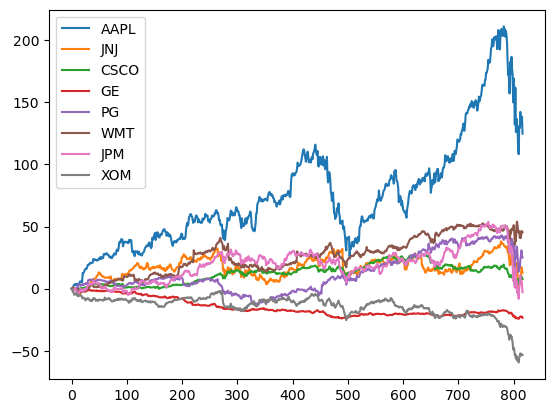

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
df_align = df[ticks].apply(lambda x: x - x[0])
for tick in ticks:
    plt.plot( df_align[tick], label=tick)
plt.legend()

Q4

One model of wealth inequality is the [pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution). 

Let's generate N = 10000 samples from a pareto distribution with parameters `a=2` using the following code:


In [44]:
# DO NOT modify this block of code
import numpy as np
N = 10000
a = 2
x = np.random.pareto(a, N)


You can think of x as the wealth of N people in a society.

(1) Plot the histogram of the samples. 

<AxesSubplot:ylabel='Count'>

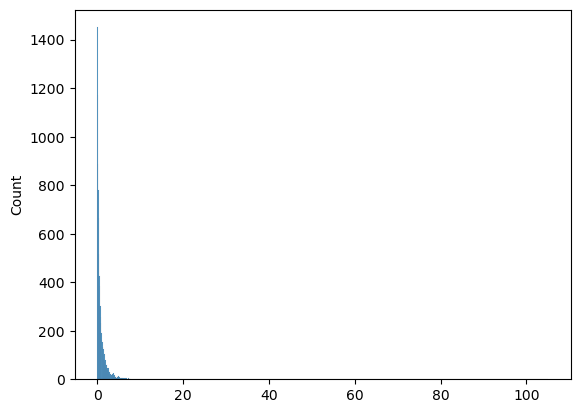

In [45]:
import seaborn as sns
sns.histplot(x)



(2) The k-quantile of a distribution is the value such that k% of the samples are less than or equal to the value. For example, the 50-quantile is the median. 

Compute the median and the mean of the samples. 

We can see the median and the mean are quite different. What is the percentage of the population that are above-average wealthy? 

In [46]:
print( f'Mean: {np.mean(x)}')
print( f'Median: {np.median(x)}')

# we can see the mean is roughly 2 times the median

Mean: 1.0594210135285338
Median: 0.41051646563398503


In [47]:
percent_above_mean = np.mean(x>np.mean(x))
print(f'Percent above mean: {percent_above_mean:.2f}')


# In this case, if someone is 'above average' in wealth, they are actually in top 30% of the population

Percent above mean: 0.24


(3) Estimate what percentage of the population owns more than 80% of the wealth? 

Hint: you can sort the array such that $x_1 > x_2 > \cdots > x_{N}$, and compute the cumulative sum of the array: $y_i = x_1 + x_2 + \cdots + x_i$. Then $y_i$ is the total wealth of the top i people. 

In [48]:
# sort x in descending order
x_sorted = np.sort(x)[::-1]

# y_i is the total wealth of the top i person in the population
y = np.cumsum(x_sorted)

In [49]:
total_wealth = sum(x)
top_n = np.argmax(y > 0.8 * total_wealth)

print(f'Top {top_n/N*100}% people have 80% of the total wealth')

Top 29.189999999999998% people have 80% of the total wealth
